###Ordenamiento Topológico


In [ ]:
import graphviz as gv

In [1]:
# Archivo muestra Lista de Adyacencia
%%file 06vesturario.txt
reloj:
ropa_interior: pantalones zapatos
medias: zapatos
pantalones: zapatos correa
camiseta: correa corbata
zapatos:
correa: chaqueta
corbata: chaqueta
chaqueta:

Writing 06vesturario.txt


In [ ]:
with open("06vesturario.txt") as f:
  labels = []   #List, para los nodos (principales)
  w2i = dict()  #Dictionary, contendrá el nodo(key) y su posicion o indice(value)
  info = []     #List, contiene los nodos adyacentes (sublista)
  for line in f: #Recorremos cada línea del Archivo
    node, neighbours = [elem.strip() for elem in line.split(":")] #1°) Separamos la línea por ":" | 2°) strip(): Remueve espacios al inicio y al final de la cadena | 3°) Se guardan en (node, neighbours)
    neighbours = neighbours.split() #Los "neighbours" (nodos adyacentes) se separan por espacios en blanco y guardan en "neighbours"
    w2i[node] = len(labels) #El diccionario "w2i" contine el nodo(key) y su posicion o indice(value)
    labels.append(node)     #La lista "labels" contiene los nodos
    info.append(neighbours) #La lista de lista "info" contiene los nodos adyacentes (sublista)

    #For TEST [rezc]:
    print("w2i[node]: ", w2i[node])
    print("labels: ", labels)
    print("info: ", info)
    print("w2i: ", w2i)
    print()


w2i[node]:  0
labels:  ['reloj']
info:  [[]]
w2i:  {'reloj': 0}

w2i[node]:  1
labels:  ['reloj', 'ropa_interior']
info:  [[], ['pantalones', 'zapatos']]
w2i:  {'reloj': 0, 'ropa_interior': 1}

w2i[node]:  2
labels:  ['reloj', 'ropa_interior', 'medias']
info:  [[], ['pantalones', 'zapatos'], ['zapatos']]
w2i:  {'reloj': 0, 'ropa_interior': 1, 'medias': 2}

w2i[node]:  3
labels:  ['reloj', 'ropa_interior', 'medias', 'pantalones']
info:  [[], ['pantalones', 'zapatos'], ['zapatos'], ['zapatos', 'correa']]
w2i:  {'reloj': 0, 'ropa_interior': 1, 'medias': 2, 'pantalones': 3}

w2i[node]:  4
labels:  ['reloj', 'ropa_interior', 'medias', 'pantalones', 'camiseta']
info:  [[], ['pantalones', 'zapatos'], ['zapatos'], ['zapatos', 'correa'], ['correa', 'corbata']]
w2i:  {'reloj': 0, 'ropa_interior': 1, 'medias': 2, 'pantalones': 3, 'camiseta': 4}

w2i[node]:  5
labels:  ['reloj', 'ropa_interior', 'medias', 'pantalones', 'camiseta', 'zapatos']
info:  [[], ['pantalones', 'zapatos'], ['zapatos'], ['za

In [ ]:
G = []  #Lista G: Contiene los indices de los nodos adyacentes
for neighbours in info: #Recorre cada sublista de "info": los Nodos Adyacentes
  G.append([w2i[node] for node in neighbours]) #Por cada elemento de la sublista = Por cada nodo adyacente, agregamos su indice a la Lista G, como sublistas de indices
    
print("w2i: ", w2i)
print("labels: ", labels)
print("G: ", G)

w2i:  {'reloj': 0, 'ropa_interior': 1, 'medias': 2, 'pantalones': 3, 'camiseta': 4, 'zapatos': 5, 'correa': 6, 'corbata': 7, 'chaqueta': 8}
labels:  ['reloj', 'ropa_interior', 'medias', 'pantalones', 'camiseta', 'zapatos', 'correa', 'corbata', 'chaqueta']
G:  [[], [3, 5], [5], [5, 6], [6, 7], [], [8], [8], []]


In [ ]:
#Genera y muestra el Grafo
# Principales métodos:
# Agregar NODO:   g.node(nombre_identificador, [etiqueta a mostrar])
# Agregar ARISTA: g.edge(nodo_inicio, nodo_fin)
def show(G, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  # Definimos el Grafo(Grafico) y sus atributos
  g = gv.Digraph("direccionado") if directed else gv.Graph("no-direccionado")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.edge_attr["fontsize"] = "8"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  n = len(G)

  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))

  added = set()
  for v, u in enumerate(path):
    if u >= 0:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break

        g.edge(str(u), str(v), str(w), dir="forward", penwidt="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidt="2", color="orange")

      added.add(f"{u}->{v}")
      added.add(f"{v}->{u}")
  if weighted:
    for u in range(n):
      for v, w in G[u]:
        if not directed and not f"{u}->{v}" in added:
          added.add(f"{u}->{v}")
          added.add(f"{v}->{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in G[u]:
        if not directed and not f"{u}->{v}" in added:
          added.add(f"{u}->{v}")
          added.add(f"{v}->{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

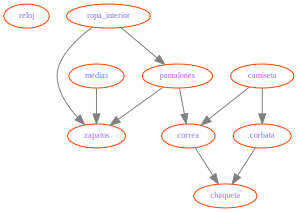

In [ ]:
show(G, directed=True, labels=labels, layout="dot")

In [ ]:
#ORDENAMIENTO TOPOLOGICO [Opcion 1]
def toposort(G):
  n = len(G)
  visited = [False]*n
  ts = []

  def dfs(u):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs(v)
    ts.append(u)

  for u in range(n):
    if not visited[u]:
      dfs(u)

  return ts

In [ ]:
ts = toposort(G)
print([labels[u] for u in reversed(ts)])

['camiseta', 'corbata', 'medias', 'ropa_interior', 'pantalones', 'correa', 'chaqueta', 'zapatos', 'reloj']


In [ ]:
#ORDENAMIENTO TOPOLOGICO [Opcion 2: Usando cola]
def toposort1(G):
  n = len(G)
  gradoin = [0]*n
  queue = [] #Cola

  for u in range(n):
    for v in G[u]:
      gradoin[v] += 1

  for u, grado in enumerate(gradoin):
    if grado == 0:
      queue.append(u)

  ts = []
  while queue:
    u = queue.pop()
    ts.append(u)
    for v in G[u]:
      gradoin[v] -= 1
      if gradoin[v] == 0:
        queue.append(v)

  return ts

In [ ]:
ts = toposort1(G)
print([labels[u] for u in ts])

['camiseta', 'corbata', 'medias', 'ropa_interior', 'pantalones', 'correa', 'chaqueta', 'zapatos', 'reloj']
